## 1. Random Forest

### 1.1 Fundamental
Random Forest is a trademark term for **an ensemble of decision trees**. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Each tree is planted & grown as follows:

1. If the number of cases in the training set is N, then sample of N cases is taken at random but with replacement. This sample will be the training set for growing the tree.
2. If there are M input variables, a number m<<M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
3. Each tree is grown to the largest extent possible. There is no pruning.

### 1.2 Example

In [1]:
# libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# build model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
rf_clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

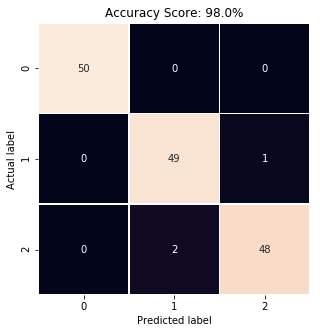

In [4]:
# evaluate model
# prediction
prediction = rf_clf.predict(iris.data)
# accurasy score
acc = rf_clf.score(X=iris.data, y=iris.target)
# calculate confusion matrices
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)

# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

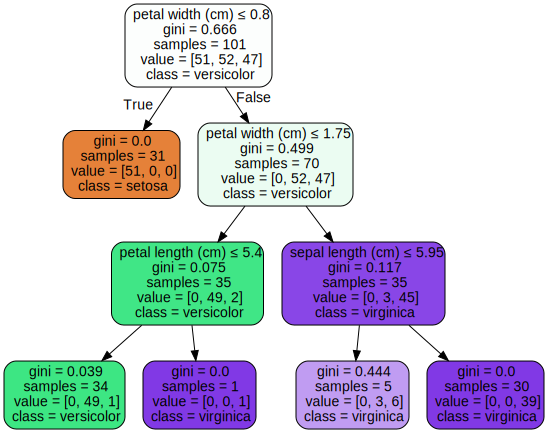

In [5]:
# visualize the first tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(rf_clf.estimators_[0], out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graphviz.Source(dot_data)

## 2. Dimensionality Reduction Algorithms
### 2.1 Fundamental

In the last 4-5 years, there has been an exponential increase in data capturing at every possible stages. Corporates/ Government Agencies/ Research organisations are not only coming with new sources but also they are capturing data in great detail.

For example: E-commerce companies are capturing more details about customer like their demographics, web crawling history, what they like or dislike, purchase history, feedback and many others to give them personalized attention more than your nearest grocery shopkeeper.

As a data scientist, the data we are offered also consist of many features, this sounds good for building good robust model but there is a challenge. How’d you identify highly significant variable(s) out 1000 or 2000? In such cases, dimensionality reduction algorithm helps us along with various other algorithms like Decision Tree, Random Forest, PCA, Factor Analysis, Identify based on correlation matrix, missing value ratio and others.

### 2.2 Example

In [6]:
# load breast_cancer data
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [7]:
# build model
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

In [8]:
# decompose feature data
X = pca.fit_transform(breast_cancer.data)

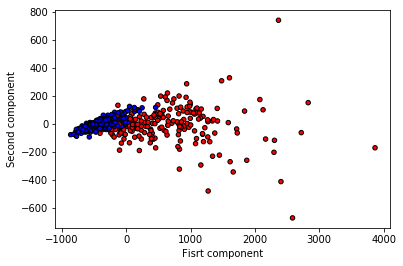

In [9]:
# plot the data
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=breast_cancer.target, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Fisrt component')
plt.ylabel('Second component')
plt.show()

## 3. Gradient Boosting Algorithms

### 3.1. GBM

GBM is a boosting algorithm used when we **deal with plenty of data** to make a prediction with high prediction power. Boosting is actually an **ensemble of learning algorithms** which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor. These boosting algorithms always work well in data science competitions like Kaggle, AV Hackathon, CrowdAnalytix.

#### Sample code is below

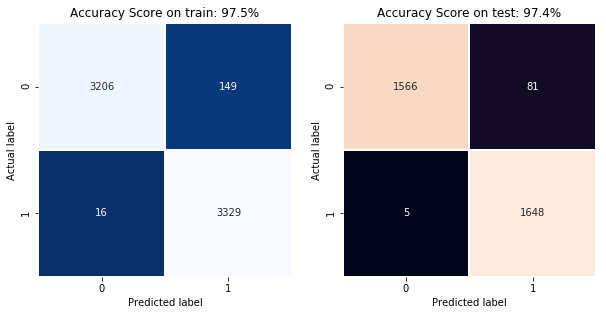

In [10]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# generate data for classification
X, y = make_classification(n_samples=10000, n_features=50, n_classes=2, random_state=10000)

# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialise the model 
grd = GradientBoostingClassifier(n_estimators=10, random_state=1000)
# train the model
grd.fit(X_train, y_train)

# geet prediction for evaluation
y_train_pred = grd.predict(X_train)
y_test_pred = grd.predict(X_test)

# accuracy score on train & test sets
train_acc = grd.score(X=X_train, y=y_train)
test_acc = grd.score(X=X_test, y=y_test)

# calculate confusion matrices
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
cm_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# visualization with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# confusion matrix on train
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='.0f', linewidths=1, square = True, cmap = 'Blues_r', cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on train: %.1f'%(train_acc*100) + '%'
plt.title(all_sample_title, size = 12);

# confusion matrix on test
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='.0f', linewidths=1, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on test: %.1f' % (test_acc*100) + '%'
plt.title(all_sample_title, size = 12)
plt.show()

In [11]:
# classification report
from sklearn.metrics import classification_report
print('='*60, '\nOn train set:\n')
print(classification_report(y_train, y_train_pred))
print('='*60, '\nOn test set:\n')
print(classification_report(y_test, y_test_pred))

On train set:

             precision    recall  f1-score   support

          0       1.00      0.96      0.97      3355
          1       0.96      1.00      0.98      3345

avg / total       0.98      0.98      0.98      6700

On test set:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      1647
          1       0.95      1.00      0.97      1653

avg / total       0.97      0.97      0.97      3300



### 3.2. XGBoost

**Not implemented in sklearn**

Another classic gradient boosting algorithm that’s known to be the decisive choice between winning and losing in some Kaggle competitions.

The XGBoost has an immensely high predictive power which makes it the best choice for accuracy in events as it possesses both linear model and the tree learning algorithm, making the algorithm almost 10x faster than existing gradient booster techniques.

The support includes various objective functions, including regression, classification and ranking.

One of the most interesting things about the XGBoost is that it is also called a regularized boosting technique. This helps to reduce overfit modelling and has a massive support for a range of languages such as Scala, Java, R, Python, Julia and C++.

Supports distributed and widespread training on many machines that encompass GCE, AWS, Azure and Yarn clusters. XGBoost can also be integrated with Spark, Flink and other cloud dataflow systems with a built in cross validation at each iteration of the boosting process.

### 3.3. LightGBM

**Not implemented in sklearn**

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency
- Lower memory usage
- Better accuracy
- Parallel and GPU learning supported
- Capable of handling large-scale data

The framework is a fast and high-performance gradient boosting one based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It was developed under the Distributed Machine Learning Toolkit Project of Microsoft.

Since the LightGBM is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

Also, it is surprisingly very fast, hence the word ‘Light’.